# Machine Learning

In [23]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
train = pd.read_csv('Email spam.csv')

In [25]:
train

,Id,spam,text
0,1.0,1.0,Subject: naturally irresistible your corporate...
1,2.0,1.0,Subject: the stock trading gunslinger fanny i...
2,3.0,1.0,Subject: unbelievable new homes made easy im ...
3,4.0,1.0,Subject: 4 color printing special request add...
4,5.0,1.0,"Subject: do not have money , get software cds ..."
...,...,...,...
2905,2909.0,0.0,Subject: re : term papers please respond to ...
2906,2910.0,0.0,Subject: re : actions on anjam ' s resignation...
2907,2911.0,0.0,"Subject: india database jim / wade , as you ..."
2908,2912.0,0.0,Subject: re : invitation - wharton et events ...


In [26]:
#
train=train.dropna()

In [27]:
train

,Id,spam,text
0,1.0,1.0,Subject: naturally irresistible your corporate...
1,2.0,1.0,Subject: the stock trading gunslinger fanny i...
2,3.0,1.0,Subject: unbelievable new homes made easy im ...
3,4.0,1.0,Subject: 4 color printing special request add...
4,5.0,1.0,"Subject: do not have money , get software cds ..."
...,...,...,...
2905,2909.0,0.0,Subject: re : term papers please respond to ...
2906,2910.0,0.0,Subject: re : actions on anjam ' s resignation...
2907,2911.0,0.0,"Subject: india database jim / wade , as you ..."
2908,2912.0,0.0,Subject: re : invitation - wharton et events ...


In [28]:
train['spam'].unique()

array([1., 0.])

In [29]:
train[train['spam']=='its termination would not  have such a phenomenal impact on the power situation .  however '].shape

(0, 3)

In [30]:
df_x=train['text']
df_y=train['spam']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3, random_state=9)
print(x_train.shape)
print(x_test.shape)

(2035,)
(873,)


In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer(min_df=1,stop_words='english')

In [34]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 


# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(tfidf_train,y_train)
clf.score(tfidf_train,y_train)

0.9980343980343981

In [36]:
tfidf_test = tfidf_vectorizer.transform(x_test) 

In [37]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(tfidf_test )
val1 = accuracy_score(y_pred,y_test)

In [38]:
import sklearn.metrics

In [39]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       442
         1.0       1.00      0.96      0.98       431

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873



In [40]:
y_pred = clf.predict(tfidf_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[440,   2],
       [ 17, 414]], dtype=int64)

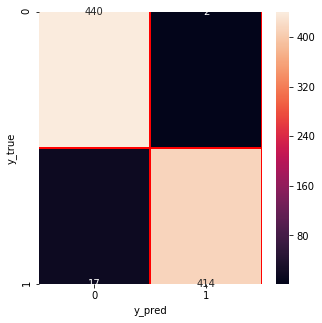

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [42]:
with open('tranform.pickle','wb') as f:
    pickle.dump(tfidf_vectorizer,f)

In [43]:
with open('model.pickle','wb') as f:
    pickle.dump(clf,f)

# Genetic Selection

In [44]:
from genetic_selection import GeneticSelectionCV
selectors = GeneticSelectionCV(clf,
                                  cv=6,
                                  verbose=2,
                                  scoring="accuracy",
                                  max_features=6,
                                  n_population=60,
                                  crossover_proba=0.6,
                                  mutation_proba=0.2,
                                  n_generations=50,
                                  crossover_independent_proba=0.6,
                                  mutation_independent_proba=0.06,
                                  tournament_size=4,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-2)
selectors = selectors.fit(tfidf_train,y_train)

ModuleNotFoundError: No module named 'genetic_selection'

In [ ]:
predictions = selectors.predict(tfidf_test)
val1a = (accuracy_score(y_test, predictions)*100)

# RAndom Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(tfidf_train,y_train)
clf.score(tfidf_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = clf.predict(tfidf_test )
val2 = accuracy_score(y_pred,y_test)

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

In [ ]:
y_pred = clf.predict(tfidf_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Gentenic Selection

In [ ]:
from genetic_selection import GeneticSelectionCV
selectors = GeneticSelectionCV(clf,
                                  cv=6,
                                  verbose=2,
                                  scoring="accuracy",
                                  max_features=6,
                                  n_population=60,
                                  crossover_proba=0.6,
                                  mutation_proba=0.2,
                                  n_generations=50,
                                  crossover_independent_proba=0.6,
                                  mutation_independent_proba=0.06,
                                  tournament_size=4,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-2)
selectors = selectors.fit(tfidf_train,y_train)

In [ ]:
predictions = selectors.predict(tfidf_test)
val2a = (accuracy_score(y_test, predictions)*100)

# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(tfidf_train,y_train)
clf.score(tfidf_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = clf.predict(tfidf_test )
val3 = accuracy_score(y_pred,y_test)

print(sklearn.metrics.classification_report(y_test, y_pred))

In [ ]:
y_pred = clf.predict(tfidf_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Genetic Selection

In [ ]:
from genetic_selection import GeneticSelectionCV
selectors = GeneticSelectionCV(clf,
                                  cv=6,
                                  verbose=2,
                                  scoring="accuracy",
                                  max_features=6,
                                  n_population=60,
                                  crossover_proba=0.6,
                                  mutation_proba=0.2,
                                  n_generations=50,
                                  crossover_independent_proba=0.6,
                                  mutation_independent_proba=0.06,
                                  tournament_size=4,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-2)
selectors = selectors.fit(tfidf_train,y_train)

In [ ]:
predictions = selectors.predict(tfidf_test)
val3a = (accuracy_score(y_test, predictions)*100)

# DEEP LEARNING

In [ ]:
df= pd.read_csv('Email spam.csv', sep=',')
df.head()

In [ ]:
df.info()

In [ ]:
df = df.dropna()

In [ ]:
df.head()

In [ ]:
X = df.text
y = df.spam

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Getting required labels only and encoding

review_labels_train = y_train

In [ ]:
# Importing required tf modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab = X_train.values

In [ ]:
# Vectorize a text corpus, by turning each text into sequence of integers

tokenizer = Tokenizer(num_words=8000,oov_token='OOV')
tokenizer.fit_on_texts(vocab)

vocab_size = len(tokenizer.word_index) + 1

print(tokenizer)
print(vocab_size)

In [ ]:
spam = X_train.values

spam_seqs = tokenizer.texts_to_sequences(spam)

padded_sequence_train = pad_sequences(spam_seqs, maxlen=200)
print(padded_sequence_train)

In [ ]:
print(padded_sequence_train[0])

# LSTM

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
trained = model.fit(padded_sequence_train,review_labels_train,
                  validation_split=0.2, epochs=5, batch_size=32)

In [ ]:
spam = X_test.values

spam_seqs = tokenizer.texts_to_sequences(spam)

padded_sequence_test = pad_sequences(spam_seqs, maxlen=200)
print(padded_sequence_test)

In [ ]:
acc_lstm = model.evaluate(padded_sequence_test,y_test)

In [ ]:
import matplotlib.pyplot as plt

x= trained
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Bidirectional LSTM

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=X_train.shape[0]))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
trained1 = model.fit(padded_sequence_train,review_labels_train,
                  validation_split=0.2, epochs=5, batch_size=32)

In [ ]:
acc_bilstm = model.evaluate(padded_sequence_test,y_test)

In [ ]:
import matplotlib.pyplot as plt

x= trained1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Hybrid CNN AND LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=X_train.shape[0]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]

In [ ]:
trained2 = model.fit(padded_sequence_train,review_labels_train,
                  validation_split=0.2, epochs=5, batch_size=32)

In [ ]:
acc_cnn = model.evaluate(padded_sequence_test,y_test)

In [ ]:
import matplotlib.pyplot as plt

x= trained2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
score = [val1*100,val2*100,val3*100,val1a,val2a,val3a,acc_lstm[1]*100,acc_bilstm[1]*100,acc_cnn[1]*100]

In [ ]:
#make variabel for save the result and to show it
classifier = ('Naive Bayes','RF','SVM','GA-NB','GA-RF','GA-SVM','LSTM','BiLSTM','Hybrid')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()